In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Placement_Data.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
data.fillna(0, inplace=True)

In [6]:
data.drop(['sl_no'], axis=1, inplace=True)

In [7]:
data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [8]:
data.rename(columns={'ssc_p':'10th_percentage', 'ssc_b':'10th_board', 'hsc_p':'12th_percentage', 'hsc_b':'12th_board', 'hsc_s':'12th_specialization', 'degree_p':'degree_percentage', 'degree_t':'degree_field', 'workex':'work_experience', 'etest_p':'ETest_percentage', 'specialisation':'PG_specialisation', 'status':'placement_status'}, inplace=True)

In [9]:
data.head()

,gender,10th_percentage,10th_board,12th_percentage,12th_board,12th_specialization,degree_percentage,degree_field,work_experience,ETest_percentage,PG_specialisation,mba_p,placement_status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Feature Engineering

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   10th_percentage      215 non-null    float64
 2   10th_board           215 non-null    object 
 3   12th_percentage      215 non-null    float64
 4   12th_board           215 non-null    object 
 5   12th_specialization  215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   degree_field         215 non-null    object 
 8   work_experience      215 non-null    object 
 9   ETest_percentage     215 non-null    float64
 10  PG_specialisation    215 non-null    object 
 11  mba_p                215 non-null    float64
 12  placement_status     215 non-null    object 
 13  salary               215 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [ ]:
# Taking Object data types and converting them to string, stripping whitespace[" Ekta " to "Ekta"], and title casing["new year" to "New Year"]
cat_cols = data.select_dtypes(include=['object']).columns
for c in cat_cols:
   data[c] = data[c].astype('str').str.strip().str.title()

In [12]:
df=data.copy()

In [13]:
#Creating Target Column
df['placed'] = df['placement_status'].apply(lambda x:1 if x =='Placed' else 0)

In [14]:
# Creating Work Experience Binary Column
df['workex_bin'] = df['work_experience'].apply(lambda x:1 if x == 'Yes' else 0)

In [15]:
# Creating Average Academic Performance Column
df['avg_academic_performance'] = df[['10th_percentage', '12th_percentage', 'degree_percentage', 'ETest_percentage', 'mba_p']].mean(axis=1)

In [16]:
# Converting Categorical Columns to Dummy Variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df,columns=categorical_columns, drop_first=True)

In [17]:
# Saving the processed DataFrame to a new CSV file
df.to_csv("Placement_Data_Processed.csv", index=False)
df.head()

,10th_percentage,12th_percentage,degree_percentage,ETest_percentage,mba_p,salary,placed,workex_bin,avg_academic_performance,gender_M,10th_board_Others,12th_board_Others,12th_specialization_Commerce,12th_specialization_Science,degree_field_Others,degree_field_Sci&Tech,work_experience_Yes,PG_specialisation_Mkt&Hr,placement_status_Placed
0,67.00,91.00,58.00,55.0,58.80,270000.0,1,0,65.960,True,True,True,True,False,False,True,False,True,True
1,79.33,78.33,77.48,86.5,66.28,200000.0,1,1,77.584,True,False,True,False,True,False,True,True,False,True
2,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,65.960,True,False,False,False,False,False,False,False,False,True
3,56.00,52.00,52.00,66.0,59.43,0.0,0,0,57.086,True,False,False,False,True,False,True,False,True,False
4,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,77.000,True,False,False,True,False,False,False,False,False,True


# EDA

C:\Users\HP\AppData\Local\Temp\ipykernel_13000\3642349236.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='placement_status', data=data, palette='Set1')


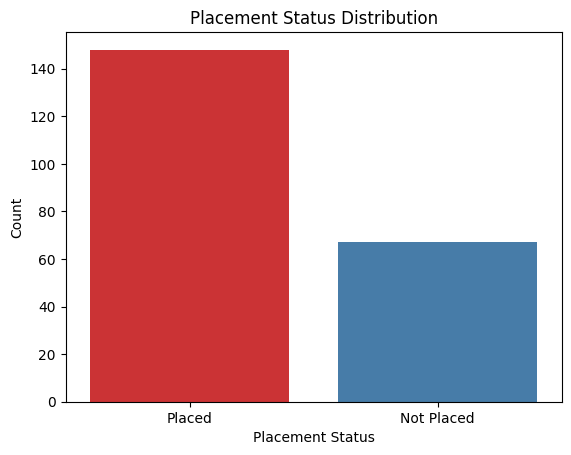

In [18]:
sns.countplot(x='placement_status', data=data, palette='Set1')
plt.title('Placement Status Distribution')
plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.show()

Placement Rate by Categories

C:\Users\HP\AppData\Local\Temp\ipykernel_13000\2664672872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='placement_status', data=data, palette='Set2')


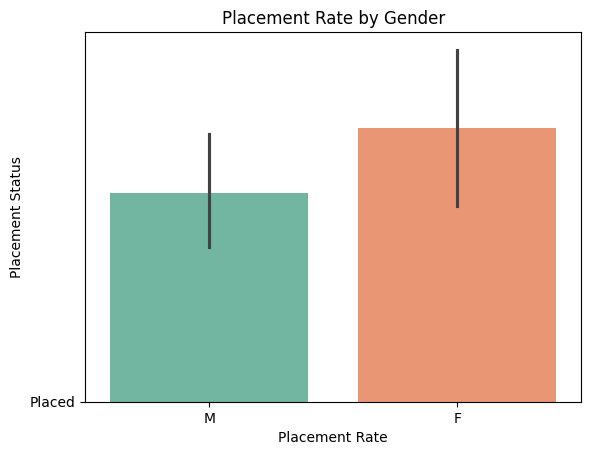

In [19]:
# 1. BY GENDER
sns.barplot(x='gender', y='placement_status', data=data, palette='Set2')
plt.title('Placement Rate by Gender')
plt.xlabel('Placement Rate')
plt.ylabel('Placement Status')
plt.gca().invert_yaxis()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13000\1344198589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workex_bin', y='placed', data=df, palette='Set2')


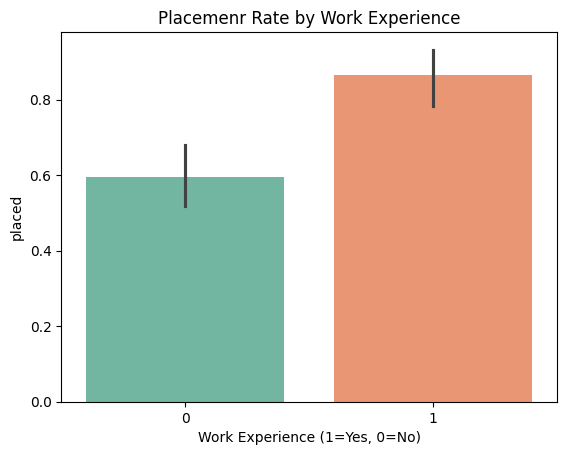

In [20]:
# 2. BY WORK EXPERIENCE
sns.barplot(x='workex_bin', y='placed', data=df, palette='Set2')
plt.title('Placemenr Rate by Work Experience')
plt.xlabel('Work Experience (1=Yes, 0=No)')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13000\910035006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='degree_field', y='placement_status', data=data, palette='Set2')


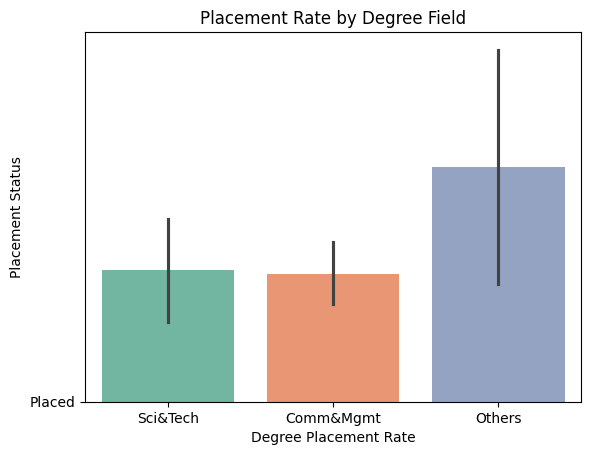

In [21]:
# 3. BY DEGREE FIELD
sns.barplot(x='degree_field', y='placement_status', data=data, palette='Set2')
plt.title('Placement Rate by Degree Field')
plt.xlabel('Degree Placement Rate')
plt.ylabel('Placement Status')
plt.gca().invert_yaxis()
plt.show()

Salary Trends

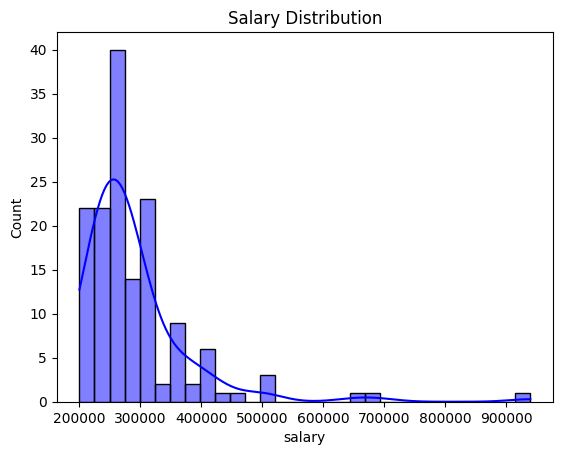

In [22]:
# 1. Distribution of Salary
sns.histplot(df[df['placed']==1]['salary'], bins=30, kde=True, color='blue')
plt.title('Salary Distribution')
plt.show()

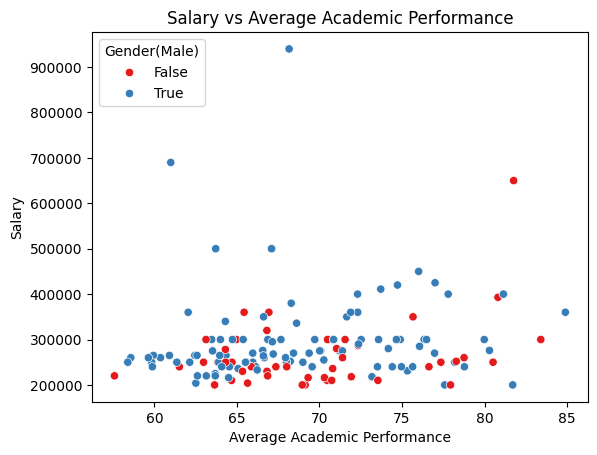

In [23]:
# Salary VS Academic Performance
sns.scatterplot(x='avg_academic_performance', y='salary', data=df[df['placed']==1], hue='gender_M', palette='Set1')
plt.title('Salary vs Average Academic Performance')
plt.xlabel('Average Academic Performance') 
plt.ylabel('Salary')
plt.legend(title='Gender(Male)', loc='upper left')
plt.show()

Correlation Analysis

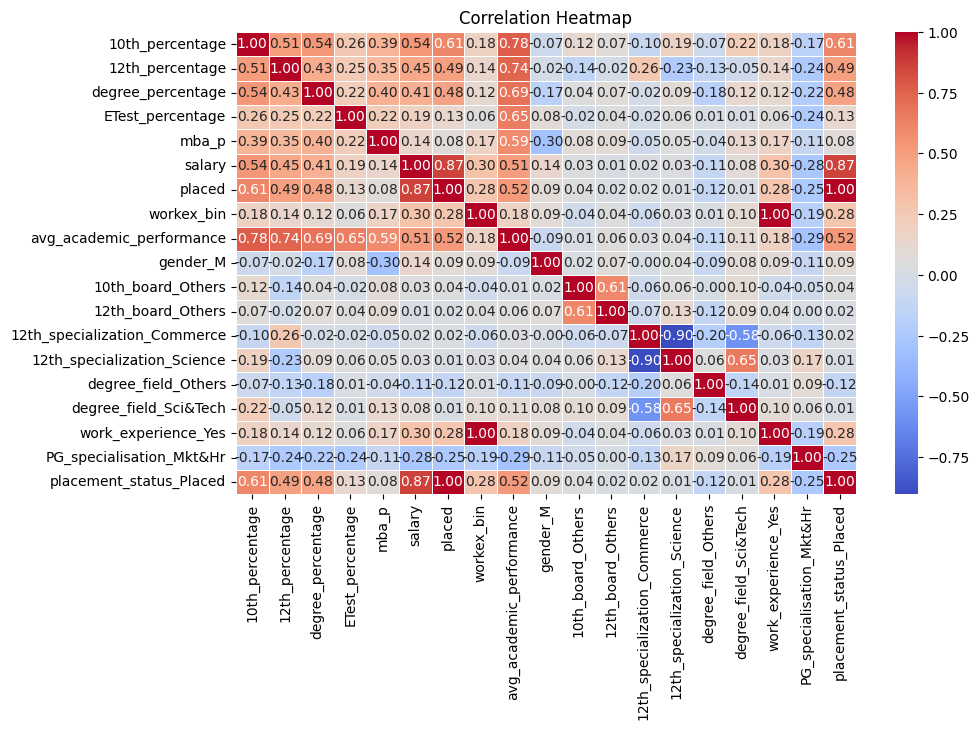

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Machine Learning Model

In [25]:
X = df.drop(columns=['salary', 'placed'])  
y = df['placed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Model

In [26]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Model Results: ")
print("\n Accuracy : ", accuracy_score(y_test,y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Model Results: 

 Accuracy :  1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        31

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Confusion Matrix:
 [[12  0]
 [ 0 31]]


Random Forest Classifier Model

In [27]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_log = rf_clf.predict(X_test)

print("\n Random Forest Classifier Model Results: ")
print("\n Accuracy : ", accuracy_score(y_test,y_pred_log))
print("\n Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


 Random Forest Classifier Model Results: 

 Accuracy :  1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        31

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Confusion Matrix:
 [[12  0]
 [ 0 31]]


Linear Regression Model : PREDICT SALARY
 (only for placed students)

In [28]:
df_salary = df[df['placed'] == 1]
X_salary = df_salary.drop(columns=['salary', 'placed'])
y_salary = df_salary['salary']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)


Linear Regression Model

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_s, y_train_s)
y_pred_lin = lin_reg.predict(X_test_s)

print("\n Linear Regression Model Results: ")
print("Mean Absolute Error:", mean_absolute_error(y_test_s, y_pred_lin))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test_s, y_pred_lin)))
print("R-squared:", r2_score(y_test_s, y_pred_lin))


 Linear Regression Model Results: 
Mean Absolute Error: 67637.43474267439
Root Mean Squared Error: 98973.50149316252
R-squared: -0.15865993993849048


Random Forest Regressor Model

In [30]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_s, y_train_s)
y_pred_rf = rf_reg.predict(X_test_s)

print("\n Random Forest Regressor Model Results: ")
print("Mean Absolute Error:", mean_absolute_error(y_test_s, y_pred_rf))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test_s, y_pred_rf)))
print("R-squared:", r2_score(y_test_s, y_pred_rf))



 Random Forest Regressor Model Results: 
Mean Absolute Error: 73157.33333333333
Root Mean Squared Error: 104517.04817875408
R-squared: -0.292088892229986


Feature Importance - Classification (Random Forest)

C:\Users\HP\AppData\Local\Temp\ipykernel_13000\1153730585.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")


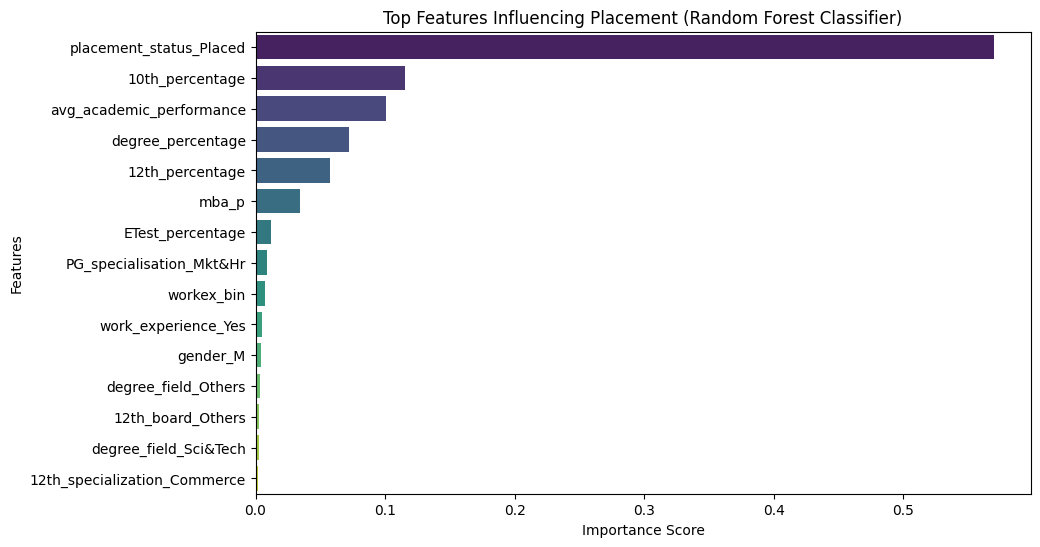

In [31]:
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False).head(15)  # top 15 features

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")
plt.title("Top Features Influencing Placement (Random Forest Classifier)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Feature Importance - Regression (Random Forest Regressor)

C:\Users\HP\AppData\Local\Temp\ipykernel_13000\460730922.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances_reg.values, y=feat_importances_reg.index, palette="magma")


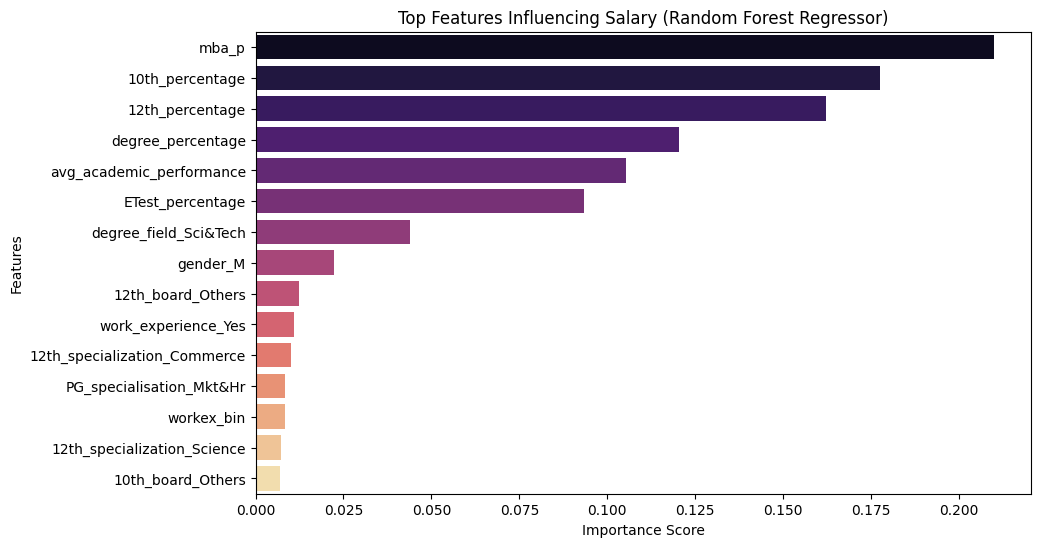

In [32]:
feat_importances_reg = pd.Series(rf_reg.feature_importances_, index=X_salary.columns)
feat_importances_reg = feat_importances_reg.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances_reg.values, y=feat_importances_reg.index, palette="magma")
plt.title("Top Features Influencing Salary (Random Forest Regressor)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()